# **Book Genre Prediction**

In [1]:
#Importing libraries.

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
#Using the pandas framework a dataset is created using the "BooksDataSet.csv" file.

books=pd.read_csv('BooksDataSet.csv')

#We only keep the 4 neccessary columns that we will be need. 
books=pd.DataFrame(books,columns=['book_id','book_name','genre','summary'])

In [3]:
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
books.shape

(3000, 4)

In [6]:
#Grouping all the rows by genre.
books.groupby('genre').count()

,book_id,book_name,summary
genre,,,
Crime Fiction,500,500,500
Fantasy,500,500,500
Historical novel,500,500,500
Horror,500,500,500
Science Fiction,500,500,500
Thriller,500,500,500


In [7]:
books['summary']


0        Drowned Wednesday is the first Trustee among ...
1        As the book opens, Jason awakens on a school ...
2        Cugel is easily persuaded by the merchant Fia...
3        The book opens with Herald-Mage Vanyel return...
4        Taran and Gurgi have returned to Caer Dallben...
                              ...                        
2995     A Novel from the NUMA files, A Kurt Austin Ad...
2996     Gilbert Kemp is dealer specializing in antiqu...
2997     "How do you know when you're in too deep? Dav...
2998     The story concerns the life of Johnnie Pascoe...
2999     The First Chief: Will Henry Lee: The novel op...
Name: summary, Length: 3000, dtype: object

In [8]:
# function for text cleaning
 
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

books.loc[:,'summary']=books.loc[:,'summary'].apply(lambda x: clean(x))

In [9]:
#Displaying "summary" after text-cleaning.
books['summary']


0       drowned wednesday is the first trustee among t...
1       as the book opens jason awakens on a school bu...
2       cugel is easily persuaded by the merchant fian...
3       the book opens with herald mage vanyel returni...
4       taran and gurgi have returned to caer dallben ...
                              ...                        
2995    a novel from the numa files a kurt austin adve...
2996    gilbert kemp is dealer specializing in antique...
2997    how do you know when youre in too deep davey h...
2998    the story concerns the life of johnnie pascoe ...
2999    the first chief will henry lee the novel opens...
Name: summary, Length: 3000, dtype: object

Graph to visualize the words and frequency in book's summary.




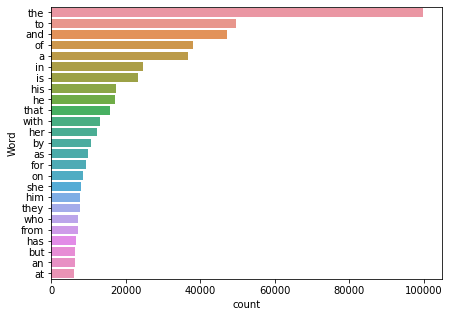

In [10]:
#Function to visualize the words and frequency in book's summary.

print("Graph to visualize the words and frequency in book's summary.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(books['summary'], 25)

In [11]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['summary'] = books['summary'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: stemming(x))

In [14]:
books['summary']


0       drown wednesday first truste among morrow day ...
1       book open jason awaken school bu unabl rememb ...
2       cugel easili persuad merchant fianosth attempt...
3       book open herald mage vanyel return countri va...
4       taran gurgi return caer dallben follow event t...
                              ...                        
2995    novel numa file kurt austin adventur novel mai...
2996    gilbert kemp dealer special antiqu gun london ...
2997    know your deep davey alway live shadow older b...
2998    stori concern life johnni pasco retir commerci...
2999    first chief henri lee novel open grow town del...
Name: summary, Length: 3000, dtype: object

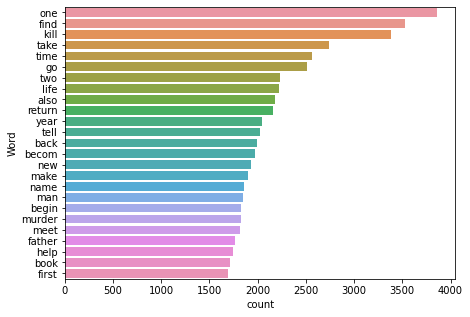

In [15]:
#Function to visualize the words and frequency in book's summary.

# print 25 most frequent words 
freqwords(books['summary'], 25)

In [16]:
#Labeling each 'genre' with an unique number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

In [17]:
#perform inverse mapping on the unique numbers representing a genre.
le.inverse_transform([0,1,2,3,4,5])

array(['Crime Fiction', 'Fantasy', 'Historical novel', 'Horror',
       'Science Fiction', 'Thriller'], dtype=object)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(books['summary'], y, test_size=0.2, random_state=557)


In [19]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(xtest.values.astype('U'))

In [20]:
svc = SVC(kernel='rbf',gamma=1)
svc.fit(xtrain_tfidf,ytrain)
svpred=svc.predict(xtest_tfidf)

print("Support Vector Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,svpred))
print ('Report : ')
print(classification_report(ytest,svpred))


Support Vector Classifier

Accuracy Score : 0.775
Report : 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.67      0.76      0.71        89
           2       0.84      0.85      0.84       110
           3       0.77      0.72      0.74       100
           4       0.83      0.77      0.80        97
           5       0.71      0.75      0.73       102

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.78       600



In [21]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xtrain_tfidf,ytrain)
rfpred=rf.predict(xtest_tfidf)

print("Random Forest Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,rfpred))
print ('Report : ')
print(classification_report(ytest,rfpred))


Random Forest Classifier

Accuracy Score : 0.6433333333333333
Report : 
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       102
           1       0.53      0.70      0.60        89
           2       0.76      0.71      0.73       110
           3       0.75      0.58      0.66       100
           4       0.70      0.71      0.70        97
           5       0.61      0.37      0.46       102

    accuracy                           0.64       600
   macro avg       0.65      0.64      0.64       600
weighted avg       0.66      0.64      0.64       600



In [22]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(xtrain_tfidf,ytrain)
dtpred=dt.predict(xtest_tfidf)

print("Decision Tree Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,dtpred))
print ('Report : ')
print(classification_report(ytest,dtpred))


Decision Tree Classifier

Accuracy Score : 0.43
Report : 
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       102
           1       0.41      0.51      0.45        89
           2       0.50      0.46      0.48       110
           3       0.48      0.40      0.43       100
           4       0.45      0.46      0.46        97
           5       0.27      0.25      0.26       102

    accuracy                           0.43       600
   macro avg       0.43      0.43      0.43       600
weighted avg       0.43      0.43      0.43       600



In [23]:
gvc = GradientBoostingClassifier()
gvc.fit(xtrain_tfidf,ytrain)
gvcpred=gvc.predict(xtest_tfidf)

print("Gradient Boosting Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,gvcpred))
print ('Report : ')
print(classification_report(ytest,gvcpred))


Gradient Boosting Classifier

Accuracy Score : 0.6433333333333333
Report : 
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       102
           1       0.58      0.55      0.56        89
           2       0.72      0.70      0.71       110
           3       0.69      0.65      0.67       100
           4       0.72      0.69      0.71        97
           5       0.49      0.50      0.50       102

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



In [24]:
lg = LGBMClassifier()
lg.fit(xtrain_tfidf,ytrain)
lgbpred=lg.predict(xtest_tfidf)

print("Naive Bayes Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,lgbpred))
print ('Report : ')
print(classification_report(ytest,lgbpred))


Naive Bayes Classifier

Accuracy Score : 0.655
Report : 
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       102
           1       0.57      0.64      0.60        89
           2       0.74      0.71      0.73       110
           3       0.67      0.62      0.64       100
           4       0.76      0.69      0.72        97
           5       0.55      0.57      0.56       102

    accuracy                           0.66       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.66      0.66      0.66       600



* Among all models Support Vector Classifier model gives highest accuracy,so we make final prediction using this model.

## **Final Support Vector Regression model**

In [25]:
model = SVC(kernel='rbf',gamma=1)
model.fit(xtrain_tfidf,ytrain)
pred=model.predict(xtest_tfidf)

print(pred)
print('\nAccuracy Score :',accuracy_score(ytest,pred))
print ('Report : ')
conf_matrix = confusion_matrix(ytest, pred)
print(classification_report(ytest,pred))


[4 5 1 5 0 0 1 5 2 4 1 4 1 2 5 2 5 1 4 5 4 3 4 2 4 2 2 5 2 4 2 2 5 3 2 2 5
 3 0 4 4 4 5 3 2 5 2 2 0 4 4 5 0 2 5 3 1 2 4 1 2 4 1 2 0 0 1 1 4 0 4 5 3 0
 1 1 4 5 2 2 5 1 5 4 4 5 2 2 2 5 4 2 0 5 3 2 5 3 3 5 0 2 5 3 3 4 2 2 0 3 4
 5 3 1 1 4 1 5 4 4 4 5 0 0 0 4 3 1 3 2 2 5 1 2 2 1 0 1 4 3 1 1 3 3 0 2 2 3
 3 2 0 4 1 4 0 0 4 1 0 4 1 2 4 2 1 4 4 3 0 3 0 3 2 0 0 3 2 5 2 4 4 3 5 3 1
 5 5 3 0 3 5 5 0 4 3 1 2 3 1 0 0 4 2 0 2 4 3 1 2 5 3 3 5 2 1 1 1 0 1 3 1 0
 0 2 4 0 1 5 5 5 5 2 3 2 1 5 4 4 3 5 3 2 0 5 5 3 1 0 4 3 0 0 2 5 0 0 5 4 5
 3 0 0 1 3 2 2 1 3 1 0 5 2 5 1 4 1 5 1 3 1 5 3 4 3 4 1 1 1 1 0 0 3 2 2 4 4
 0 5 1 2 2 1 3 3 4 3 1 5 0 1 3 3 0 2 0 5 2 2 0 5 0 2 3 4 1 3 0 5 1 2 3 3 3
 0 5 1 2 2 2 5 2 1 3 0 1 0 1 4 3 0 0 4 3 5 4 0 4 2 0 3 3 3 1 2 5 0 2 5 4 2
 5 0 3 0 5 5 5 5 5 0 2 2 2 4 1 5 3 0 5 1 4 0 1 5 4 2 1 2 5 4 5 5 3 3 5 3 1
 0 3 0 4 0 2 1 5 5 1 1 4 2 3 0 4 4 2 2 5 5 3 3 4 5 5 2 5 5 2 5 5 4 4 1 2 4
 4 5 1 2 1 4 0 1 5 1 4 2 3 5 1 3 2 1 3 0 4 0 0 4 4 2 3 0 2 1 2 4 5 0 1 3 4
 5 3 0 0 1 1 5 5 0 0 3 0 

In [26]:
k = xtest.sample(1).index[0]
k

1576

## Testing our Model by comparing Actual genre with Predicted genre

In [27]:
def process(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = model.predict(q_vec)
    return le.inverse_transform(q_pred)[0]

for i in range(50):
  k = xtest.sample(1).index[0]
  
  print("\nBook: ", books['book_name'][k] )
  print("\nPredicted genre: ", process(xtest[k]))
  print("\nActual genre: ",books['genre'][k], "\n")
  print("-------------------------------")



Book:  Marazan

Predicted genre:  Historical novel

Actual genre:  Thriller 

-------------------------------

Book:  Johnny Gone Down

Predicted genre:  Thriller

Actual genre:  Thriller 

-------------------------------

Book:  Thirteenth City

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  The Husband

Predicted genre:  Fantasy

Actual genre:  Thriller 

-------------------------------

Book:  Candle

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  Blind Lake

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  Echo Park

Predicted genre:  Crime Fiction

Actual genre:  Crime Fiction 

-------------------------------

Book:  Sons of Destiny

Predicted genre:  Horror

Actual genre:  Horror 

-------------------------------

Book:  Quarantine

Predicted genre:  Horror

Actual genre:  Historical novel 

--------